In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [3]:
cat_files = glob("/kaggle/input/cat-and-dog/training_set/training_set/cats/*.jpg")
dog_files = glob("/kaggle/input/cat-and-dog/training_set/training_set/dogs/*.jpg")

In [4]:
cat_files[0]

'/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3498.jpg'

In [5]:
dog_files[0]

'/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg'

# Video Processing

In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess

Need to convert .mov to .mp4

In [7]:
input_file = '../input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/026c7465-309f6d33.mov'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                '026c7465-309f6d33.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '../input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/026c7465-309f6d33.mov', '-qscale', '0', '026c7465-309f6d33.mp4', '-loglevel', 'quiet'], returncode=0)

In [8]:
!ls -GFlash --color

total 15M
4.0K drwxr-xr-x 2 root 4.0K Aug  3 05:12 ./
4.0K drwxr-xr-x 6 root 4.0K Aug  3 05:11 ../
 14M -rw-r--r-- 1 root  14M Aug  3 05:13 026c7465-309f6d33.mp4
924K ---------- 1 root 921K Aug  3 05:13 __notebook__.ipynb


Display Video in Notebook

In [9]:
ipd.Video('026c7465-309f6d33.mp4', width=700)

Open the Video & Read Metadata

In [10]:
# Load in video capture
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

In [11]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

2398.0

In [12]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

print(height, width)

720.0 1280.0


In [13]:
cap.get(cv2.CAP_PROP_FPS)

59.94005994005994

In [14]:
cap.release()

Pulling images from video

In [15]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
ret, img = cap.read()
print(f"Returned {ret} and image shape of : {img.shape}")
# type(ret),type(img)

Returned True and image shape of : (720, 1280, 3)


In [16]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")
    

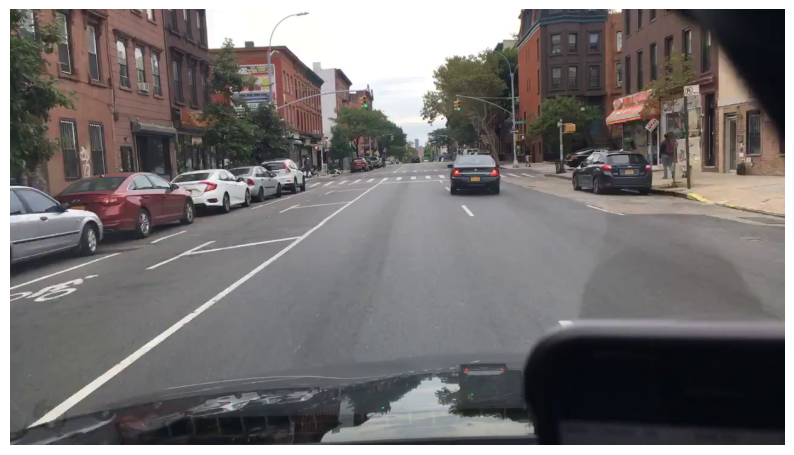

In [17]:
display_cv2_img(img)

In [18]:
cap.release()

Display multiple frames from video

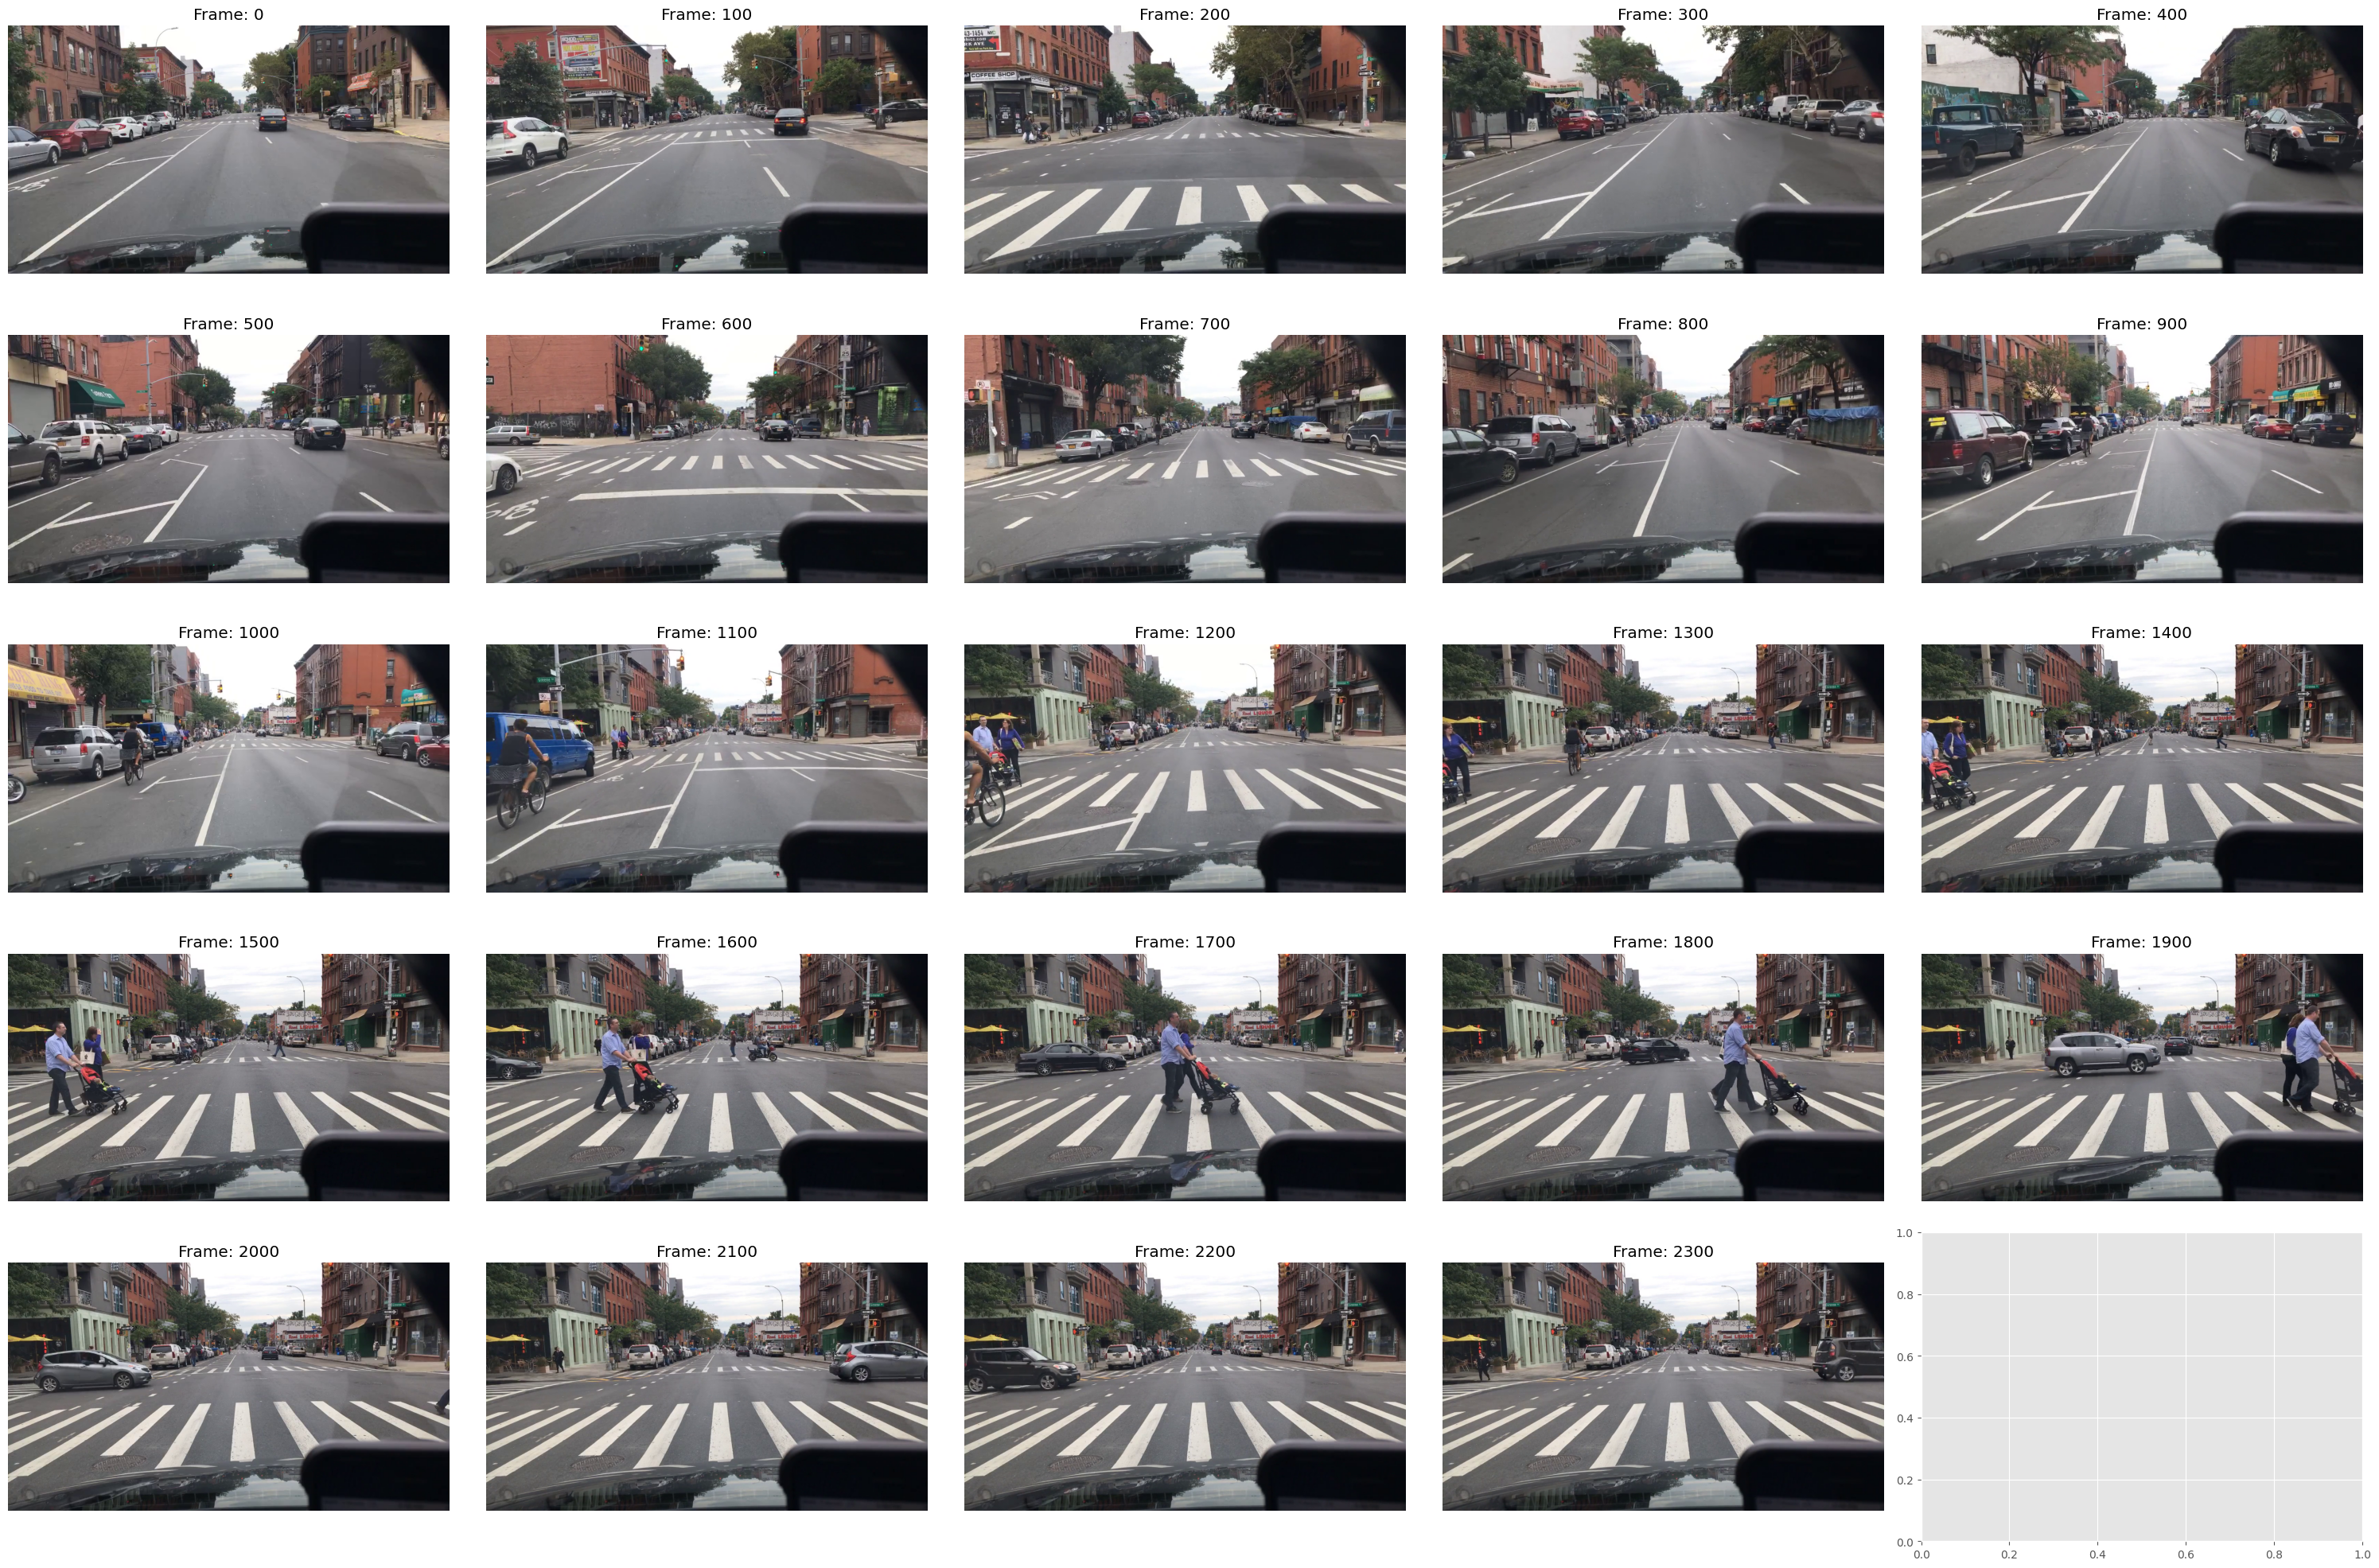

In [19]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("026c7465-309f6d33.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

Add Annotations to video images